In [410]:
import pandas as pd
import seaborn as sns
import data_processing
import ast
import visualization
import geopandas as gpd
from matplotlib.lines import Line2D
from consts import *
from matplotlib import pyplot as plt



In [411]:
buildings = pd.read_csv(BUILDINGS_DIR.joinpath("buildings_filtered_metadata.csv"))
roofs = pd.read_csv(ROOFS_DIR.joinpath("roofs_data_cleaned.csv"))

In [412]:
buildings[ETAK_ID] = buildings[ETAK_ID].astype(str)
buildings[EHR_CODE] = buildings[EHR_CODE].astype(str)


In [413]:
buildings.columns

Index(['etak_id', 'lat', 'lon', 'total_roof_area', 'district', 'ehr_code',
       ADDRESS_ID, 'address', 'name', 'type', 'year', 'total_area', 'floors',
       'energy_label', 'residential', 'assembly', 'business', 'educational',
       'industrial', 'institutional', 'mercantile', 'storage', 'other'],
      dtype='object')

In [414]:
buildings.head(1)

,etak_id,lat,lon,total_roof_area,district,ehr_code,address_id,address,name,type,...,energy_label,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other
0,728449,58.354539,26.7276,34.22,Ropka,nan,ME03036628,"Vasara tänav 10, Tartu linn",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:
buildings.describe()

,lat,lon,total_roof_area,year,total_area,floors,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other
count,17543.000000,17543.000000,17543.000000,11157.000000,12615.000000,12597.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000
mean,58.371088,26.709950,278.734642,1978.786233,604.600032,1.891800,0.623901,0.011719,0.024398,0.010092,0.023287,0.006769,0.016218,0.020135,0.012216
std,0.018238,0.047109,750.855618,24.070805,1880.462842,1.116134,0.350359,0.096766,0.135424,0.092384,0.155217,0.079536,0.110203,0.135833,0.108308
min,58.334260,26.482851,28.020000,1802.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.356977,26.698569,81.385000,1977.000000,119.450000,1.000000,0.475295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.368862,26.715869,154.130000,1977.000000,204.100000,2.000000,0.701456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.383006,26.731351,239.205000,1995.000000,352.100000,2.000000,0.905781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.455057,26.796464,36618.550000,2022.000000,109398.100000,23.000000,2.707483,1.056653,1.909282,1.313654,6.317444,1.349477,1.940299,1.052192,1.000000


In [416]:
buildings.describe()

,lat,lon,total_roof_area,year,total_area,floors,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other
count,17543.000000,17543.000000,17543.000000,11157.000000,12615.000000,12597.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000,12615.000000
mean,58.371088,26.709950,278.734642,1978.786233,604.600032,1.891800,0.623901,0.011719,0.024398,0.010092,0.023287,0.006769,0.016218,0.020135,0.012216
std,0.018238,0.047109,750.855618,24.070805,1880.462842,1.116134,0.350359,0.096766,0.135424,0.092384,0.155217,0.079536,0.110203,0.135833,0.108308
min,58.334260,26.482851,28.020000,1802.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.356977,26.698569,81.385000,1977.000000,119.450000,1.000000,0.475295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.368862,26.715869,154.130000,1977.000000,204.100000,2.000000,0.701456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.383006,26.731351,239.205000,1995.000000,352.100000,2.000000,0.905781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.455057,26.796464,36618.550000,2022.000000,109398.100000,23.000000,2.707483,1.056653,1.909282,1.313654,6.317444,1.349477,1.940299,1.052192,1.000000


In [417]:
buildings.shape

(17543, 23)

In [418]:
roofs[ETAK_ID] = roofs[ETAK_ID].astype(str)
roofs[ROOF_ID] = roofs[ROOF_ID].astype(str)


In [419]:
roofs = roofs[roofs[ETAK_ID].isin(buildings[ETAK_ID].to_list())]

In [420]:
roofs.columns

Index(['etak_id', 'roof_id', 'tilt', 'azimuth', 'orientation', 'roof_area',
       'points', 'azimuth_new', 'orientation_new', 'tilt_rounded',
       'azimuth_new_rounded'],
      dtype='object')

In [421]:
roofs.drop(columns=[ORIENTATION, AZIMUTH], inplace=True)

In [422]:
roofs.head(1)

,etak_id,roof_id,tilt,roof_area,points,azimuth_new,orientation_new,tilt_rounded,azimuth_new_rounded
0,728449,2,7.901,34.221977,"[[6471469.5, 659649.43, 2.8699999999999974], [...",175.506872,none,8,176


In [423]:
roofs.describe()

,tilt,roof_area,azimuth_new,tilt_rounded,azimuth_new_rounded
count,72446.000000,72446.000000,72446.000000,72446.000000,72446.000000
mean,22.183004,66.510806,-1.140756,22.181018,-1.143500
std,16.326522,167.283369,104.499642,16.334527,104.500139
min,0.000000,2.003090,-180.000000,0.000000,-180.000000
25%,7.453000,13.559419,-91.498569,7.000000,-91.000000
50%,19.778000,30.782643,-5.163672,20.000000,-5.000000
75%,35.817500,63.025971,87.063168,36.000000,87.000000
max,59.997000,9387.990723,180.000000,60.000000,180.000000


In [424]:
roofs[roofs[ORIENTATION_NEW] != NONE].describe()

,tilt,roof_area,azimuth_new,tilt_rounded,azimuth_new_rounded
count,50741.000000,50741.000000,50741.000000,50741.000000,50741.000000
mean,30.097449,48.705367,0.818909,30.097692,0.815672
std,12.941898,81.199949,103.695985,12.948501,103.696285
min,10.001000,2.003090,-180.000000,10.000000,-180.000000
25%,18.576000,14.202836,-91.247146,19.000000,-91.000000
50%,28.884000,29.678977,-2.484118,29.000000,-2.000000
75%,41.889000,58.834792,87.379135,42.000000,87.000000
max,59.997000,4406.237395,180.000000,60.000000,180.000000


In [425]:
predominant_orientation = roofs.groupby([ETAK_ID, ORIENTATION_NEW], as_index=False)[ROOF_AREA]\
    .sum()\
    .reset_index(drop=True)\
    .sort_values([ETAK_ID, ROOF_AREA], ascending=[True, False])\
    .drop_duplicates(ETAK_ID)\
    .drop(columns=[ROOF_AREA])


In [426]:
predominant_orientation.rename(columns={ORIENTATION_NEW: "predominant_orientation"}, inplace=True)

In [427]:
buildings = buildings.merge(predominant_orientation, on='etak_id')

In [428]:
buildings.head(1)

,etak_id,lat,lon,total_roof_area,district,ehr_code,address_id,address,name,type,...,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation
0,728449,58.354539,26.7276,34.22,Ropka,nan,ME03036628,"Vasara tänav 10, Tartu linn",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none


/Users/ilianikolaev/Desktop/solar-balance-analysis/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


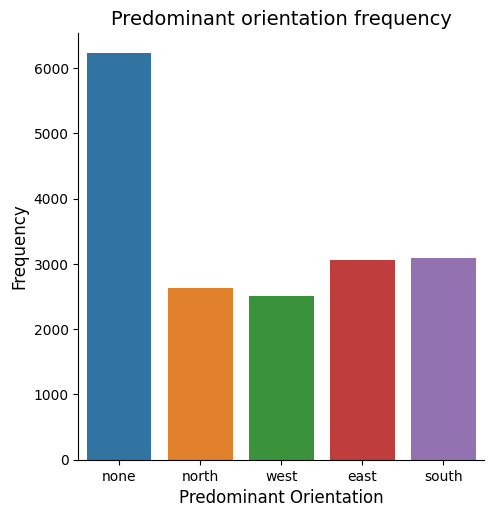

In [450]:
sns.catplot(data=buildings, x="predominant_orientation", kind="count")
plt.title('Predominant orientation frequency', fontsize=14)
plt.xlabel('Predominant Orientation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [94]:
roofs.head(1)

,etak_id,roof_id,tilt,roof_area,points,azimuth_new,orientation_new,tilt_rounded,azimuth_new_rounded
0,728449,2,7.901,34.221977,"[[6471469.5, 659649.43, 2.8699999999999974], [...",175.506872,none,8,176


In [95]:
roofs.drop(columns=[TILT, AZIMUTH_NEW], inplace=True)
roofs[TILT] = roofs[TILT + "_rounded"]
roofs[AZIMUTH_NEW] = roofs[AZIMUTH_NEW + "_rounded"]
roofs.drop(columns=[TILT + "_rounded", AZIMUTH_NEW + "_rounded"], inplace=True)


In [96]:
roofs.head(1)

,etak_id,roof_id,roof_area,points,orientation_new,tilt,azimuth_new
0,728449,2,34.221977,"[[6471469.5, 659649.43, 2.8699999999999974], [...",none,8,176


/Users/ilianikolaev/Desktop/solar-balance-analysis/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x300 with 0 Axes>

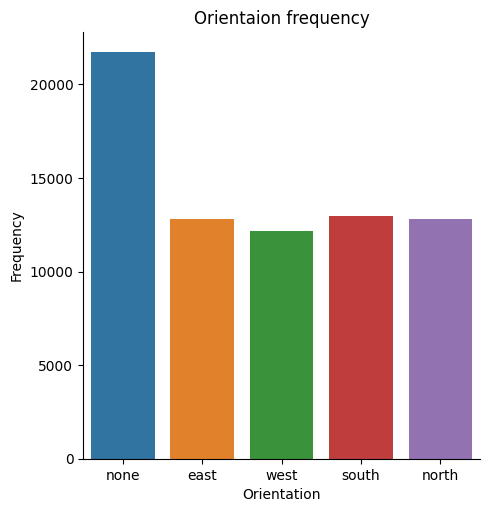

In [445]:
plt.figure(figsize=(7, 3))
sns.catplot(data=roofs, x=ORIENTATION_NEW, kind="count")
plt.title('Orientaion frequency')
plt.xlabel('Orientation')
plt.ylabel('Frequency')
plt.show()

In [98]:
roofs.groupby(ORIENTATION_NEW)[ROOF_AREA].sum() / roofs[ROOF_AREA].sum() * 100


orientation_new
east     13.268439
none     48.710411
north    12.784215
south    12.805337
west     12.431598
Name: roof_area, dtype: float64

In [99]:
estimated_production_by_roof = pd.read_csv(ROOFS_DIR.joinpath("estimated_production.csv"))

In [100]:
estimated_production_by_roof.shape

(45993, 23)

In [101]:
estimated_production_by_roof[ETAK_ID] = estimated_production_by_roof[ETAK_ID].astype(str)
estimated_production_by_roof[ROOF_ID] = estimated_production_by_roof[ROOF_ID].astype(str)

In [102]:
estimated_production_by_roof.head()

,etak_id,roof_id,roof_area,points,orientation,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,...,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
0,333302,60414,51.830155,"[[6481314.09, 652658.48, 5.910000000000004], [...",east,47,-64,140.88,6.74,11.74,...,11.98,16.69,21.99,21.54,21.17,17.55,12.26,6.36,2.07,1.27
1,333303,9498,107.085841,"[[6481312.87, 653027.5, 5.160000000000004], [6...",west,36,77,135.15,5.70,11.26,...,10.55,16.65,21.80,21.94,21.55,17.44,11.34,5.43,1.61,0.78
2,333305,57589,25.433077,"[[6481286.87, 652690.19, 3.030000000000001], [...",east,16,-62,141.55,5.88,11.80,...,11.27,17.03,23.04,23.03,22.53,18.10,11.89,5.69,1.68,0.85
3,333307,29198,49.289971,"[[6481271.71, 652993.28, 6.859999999999999], [...",south,45,25,160.01,8.49,13.33,...,14.43,19.48,23.41,22.30,22.39,19.54,14.46,8.01,2.89,1.95
4,333308,40253,37.824553,"[[6481265.34, 653109.24, 3.6300000000000026], ...",east,18,-71,138.89,5.68,11.57,...,10.97,16.69,22.74,22.76,22.25,17.81,11.63,5.52,1.61,0.79


In [103]:
estimated_production_by_roof.describe()

,roof_area,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,total_loss,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
count,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000,45993.000000
mean,77.590314,17.964342,-1.123628,155.371509,7.720838,12.945360,-22.989667,2.749680,7.038807,13.575814,18.740026,23.465825,22.714464,22.606941,19.184989,13.754756,7.374293,2.537288,1.623784
std,199.603722,16.298292,81.369507,11.018680,1.230067,0.916349,0.330100,0.778775,1.507121,1.713558,1.273420,0.828848,0.621491,0.670205,0.967846,1.377986,1.174554,0.575765,0.523000
min,2.003174,0.000000,-180.000000,115.710000,4.910000,9.640000,-24.190000,1.100000,3.670000,8.770000,13.680000,18.820000,18.790000,18.240000,14.700000,9.650000,4.500000,1.280000,0.530000
25%,14.247467,4.000000,-60.000000,148.160000,6.700000,12.350000,-23.180000,2.050000,5.720000,12.210000,17.940000,23.250000,22.720000,22.530000,18.690000,12.720000,6.380000,2.020000,1.140000
50%,32.269512,13.000000,-4.000000,162.100000,8.550000,13.510000,-22.760000,3.310000,8.090000,14.690000,19.550000,23.910000,22.720000,22.810000,19.790000,14.630000,8.160000,2.940000,2.010000
75%,67.288825,30.000000,55.000000,164.100000,8.740000,13.670000,-22.750000,3.400000,8.300000,15.000000,19.730000,23.910000,22.980000,22.810000,19.890000,14.890000,8.360000,3.020000,2.060000
max,9387.990723,60.000000,180.000000,164.100000,9.100000,13.680000,-22.540000,3.870000,9.010000,15.300000,19.780000,24.390000,23.740000,23.530000,19.990000,14.990000,8.760000,3.320000,2.410000


In [104]:
estimated_production_by_roof[ORIENTATION] = estimated_production_by_roof.apply(lambda item: data_processing.get_orientation(item, AZIMUTH), axis=1)

In [105]:
estimated_production_by_roof[estimated_production_by_roof[ORIENTATION] == NONE][ANNUAL_KWH_PV_M2].mean()

164.1

In [106]:
non_flat_roofs = estimated_production_by_roof[estimated_production_by_roof[ORIENTATION] != NONE]


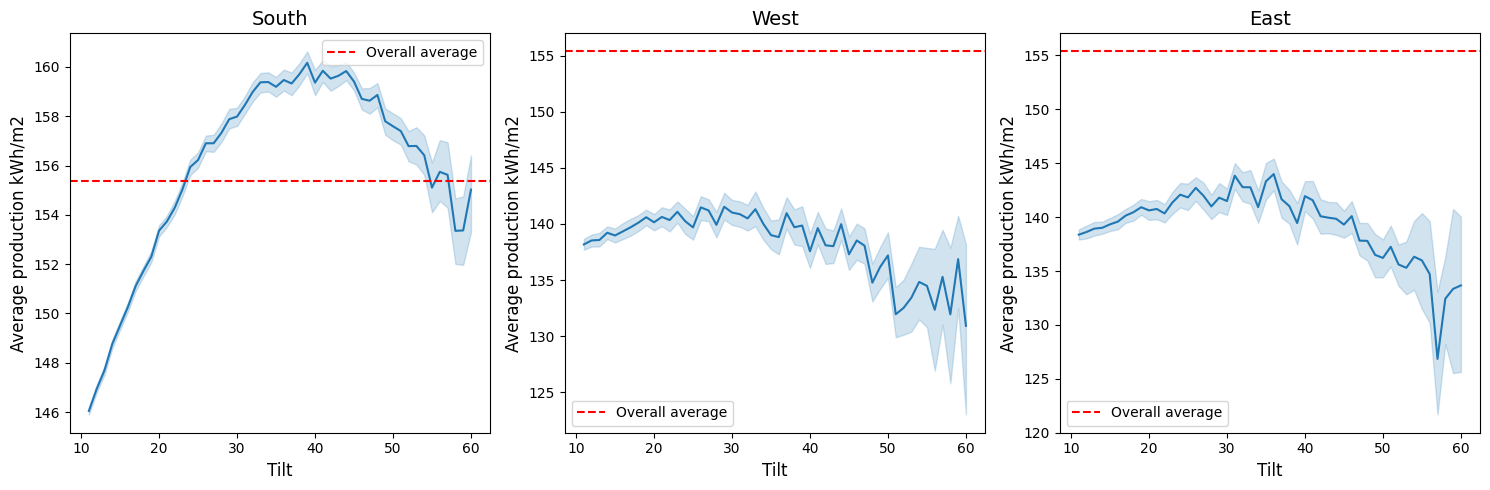

In [489]:
orientations = [SOUTH, WEST, EAST]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, orientation in enumerate(orientations):
    ax = axes[i]
    sns.lineplot(data=non_flat_roofs[non_flat_roofs[ORIENTATION] == orientation], x=TILT, y=ANNUAL_KWH_PV_M2, estimator='mean', ax=ax)
    ax.axhline(y=estimated_production_by_roof[ANNUAL_KWH_PV_M2].mean(), color='r', linestyle='--', label='Overall average')
    ax.set_xlabel('Tilt', fontsize=12)
    ax.set_ylabel('Average production kWh/m2', fontsize=12)
    ax.set_title(f'{orientation.capitalize()}', fontsize=14)
    ax.legend()
plt.tight_layout()
plt.show()


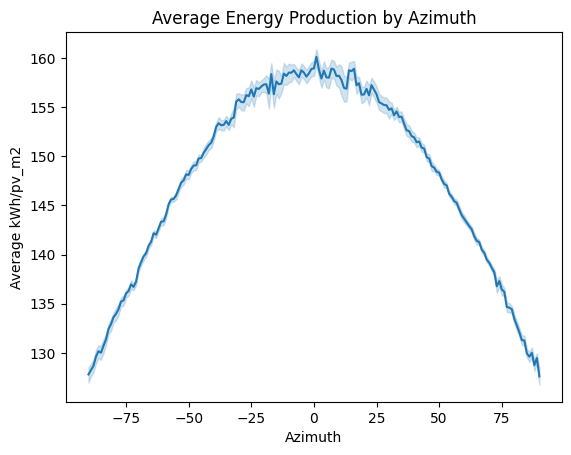

In [111]:
sns.lineplot(data=non_flat_roofs, x=AZIMUTH, y=ANNUAL_KWH_PV_M2, estimator='mean')
plt.xlabel('Azimuth')
plt.ylabel('Average kWh/pv_m2')
plt.title('Average Energy Production by Azimuth')
plt.show()

In [471]:
avg_kwh_per_combination = non_flat_roofs.groupby([TILT, AZIMUTH])[ANNUAL_KWH_PV_M2].mean().reset_index()


In [490]:
optimal_combination = avg_kwh_per_combination.loc[avg_kwh_per_combination[ANNUAL_KWH_PV_M2].idxmax()]
max_avg_kwh = optimal_combination.max()
optimal_tilt = optimal_combination['tilt']
optimal_azimuth = optimal_combination['azimuth']

print("Max Average kWh/pv_m2:", max_avg_kwh)
print("Optimal Tilt:", optimal_tilt)
print("Optimal Azimuth:", optimal_azimuth)

Max Average kWh/pv_m2: 164.1
Optimal Tilt: 41.0
Optimal Azimuth: -1.0


In [115]:
estimated_production_by_building = pd.read_csv(BUILDINGS_DIR.joinpath("new_estimated_prod_by_building.csv"))


In [116]:
estimated_production_by_building.shape

(16757, 17)

In [117]:
estimated_production_by_building.head()

,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
0,333302,140.88,6.74,11.74,51.830155,2.20,5.80,11.98,16.69,21.99,21.54,21.17,17.55,12.26,6.36,2.07,1.27
1,333303,135.15,5.70,11.26,107.085841,1.48,4.59,10.55,16.65,21.80,21.94,21.55,17.44,11.34,5.43,1.61,0.78
2,333305,141.55,5.88,11.80,25.433077,1.61,4.83,11.27,17.03,23.04,23.03,22.53,18.10,11.89,5.69,1.68,0.85
3,333307,160.01,8.49,13.33,49.289971,3.22,7.93,14.43,19.48,23.41,22.30,22.39,19.54,14.46,8.01,2.89,1.95
4,333308,138.89,5.68,11.57,37.824553,1.51,4.62,10.97,16.69,22.74,22.76,22.25,17.81,11.63,5.52,1.61,0.79


In [118]:
estimated_production_by_building[ETAK_ID] = estimated_production_by_building[ETAK_ID].astype(str)

In [119]:
estimated_production_by_building_final = estimated_production_by_building.merge(buildings, how="left", on=ETAK_ID)

In [120]:
estimated_production_by_building_final.head()

,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,...,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation
0,333302,140.88,6.74,11.74,51.830155,2.20,5.80,11.98,16.69,21.99,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,west
1,333303,135.15,5.70,11.26,107.085841,1.48,4.59,10.55,16.65,21.80,...,0.841743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,west
2,333305,141.55,5.88,11.80,25.433077,1.61,4.83,11.27,17.03,23.04,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,north
3,333307,160.01,8.49,13.33,49.289971,3.22,7.93,14.43,19.48,23.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,north
4,333308,138.89,5.68,11.57,37.824553,1.51,4.62,10.97,16.69,22.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,east


In [512]:
estimated_production_by_building_final[[ANNUAL_KWH_PV_M2, MONTHLY_AVERAGE_KWH_PV_M2]].describe()

,annual_kwh/pv_m2,monthly_average_kwh/pv_m2
count,16757.000000,16757.000000
mean,155.024721,12.916535
std,9.264001,0.770362
min,116.820000,9.730000
25%,149.455000,12.454000
50%,156.442500,13.035000
75%,164.100000,13.670000
max,164.100000,13.680000


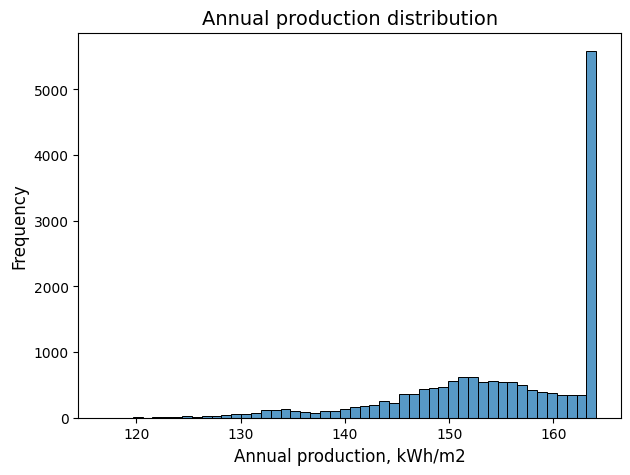

In [443]:
visualization.plot_hist(estimated_production_by_building_final[ANNUAL_KWH_PV_M2], "Annual production distribution", "Annual production, kWh/m2", "Frequency", figsize=(7, 5), bins=50)

In [122]:
estimated_production_by_building_final.to_csv(BUILDINGS_DIR.joinpath("new_prod_with_metadata.csv"), index=False)

In [123]:
estimated_production_by_building_final.columns

Index(['etak_id', 'annual_kwh/pv_m2', 'y-y_variation/pv_m2',
       'monthly_average_kwh/pv_m2', 'pv_suitable_area', 'Jan_kwh/pv_m2',
       'Feb_kwh/pv_m2', 'Mar_kwh/pv_m2', 'Apr_kwh/pv_m2', 'May_kwh/pv_m2',
       'Jun_kwh/pv_m2', 'Jul_kwh/pv_m2', 'Aug_kwh/pv_m2', 'Sep_kwh/pv_m2',
       'Oct_kwh/pv_m2', 'Nov_kwh/pv_m2', 'Dec_kwh/pv_m2', 'lat', 'lon',
       'total_roof_area', 'district', 'ehr_code', ADDRESS_ID, 'address',
       'name', 'type', 'year', 'total_area', 'floors', 'energy_label',
       'residential', 'assembly', 'business', 'educational', 'industrial',
       'institutional', 'mercantile', 'storage', 'other',
       'predominant_orientation'],
      dtype='object')

In [513]:
data_to_plot = estimated_production_by_building_final[estimated_production_by_building_final[DISTRICT] != "Endine Tähtvere vald"]

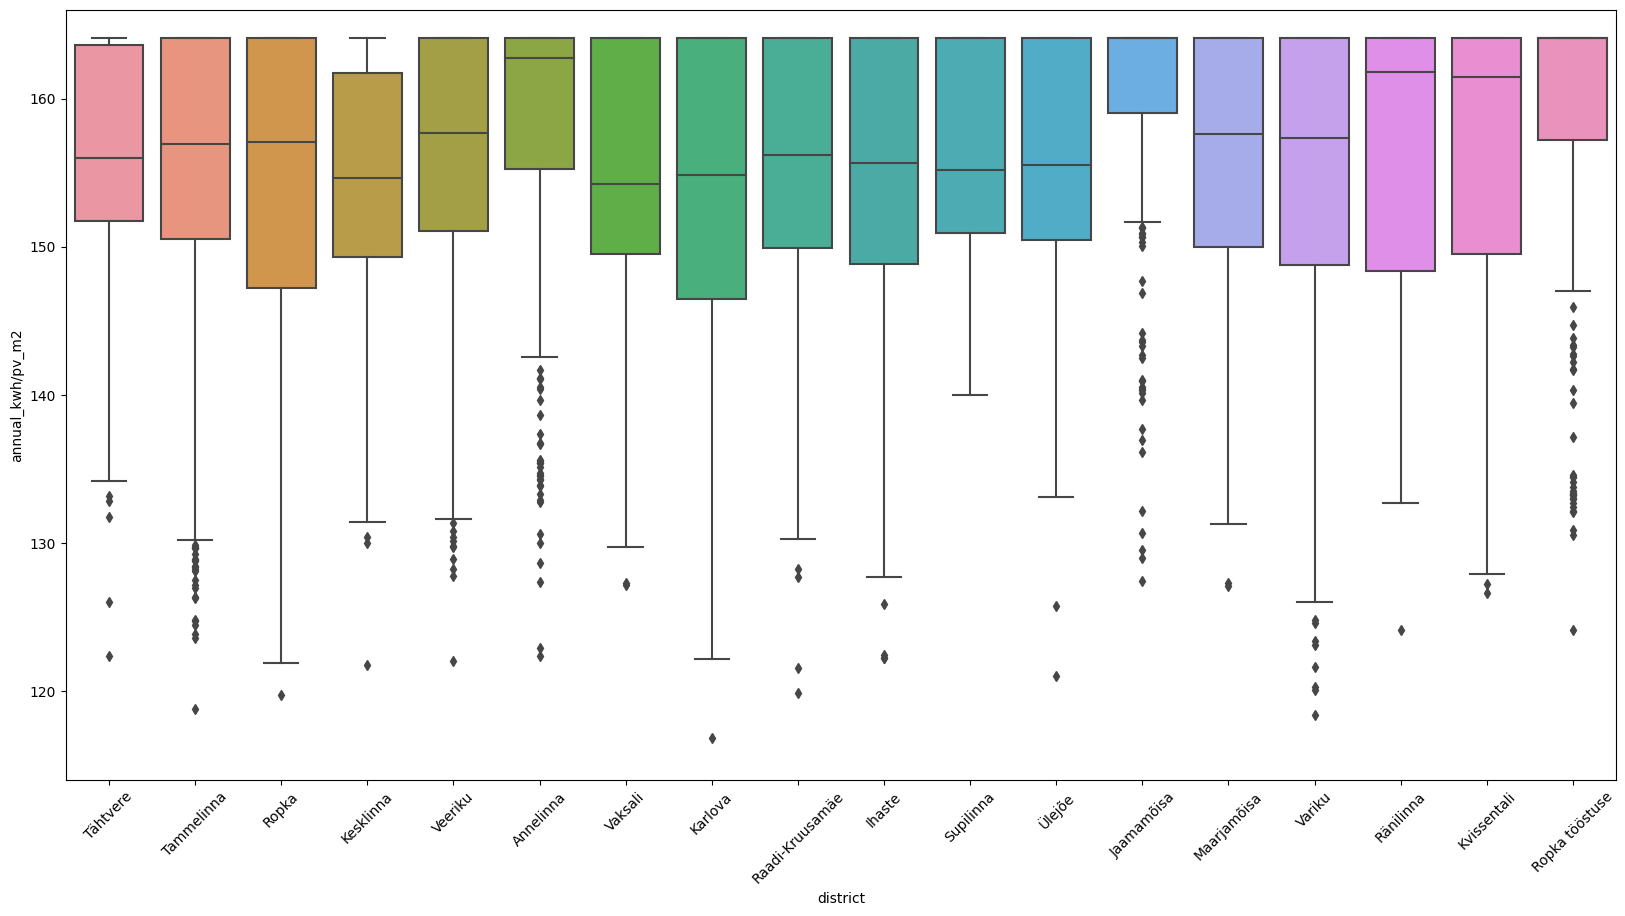

In [516]:
box_plot_district_data = pd.concat(
    [data_to_plot[ANNUAL_KWH_PV_M2], data_to_plot[DISTRICT]],
    axis=1
)
fig, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=DISTRICT, y=ANNUAL_KWH_PV_M2, data=box_plot_district_data)
fig.axis(ymin=114, ymax=166)
xt = plt.xticks(rotation=45)


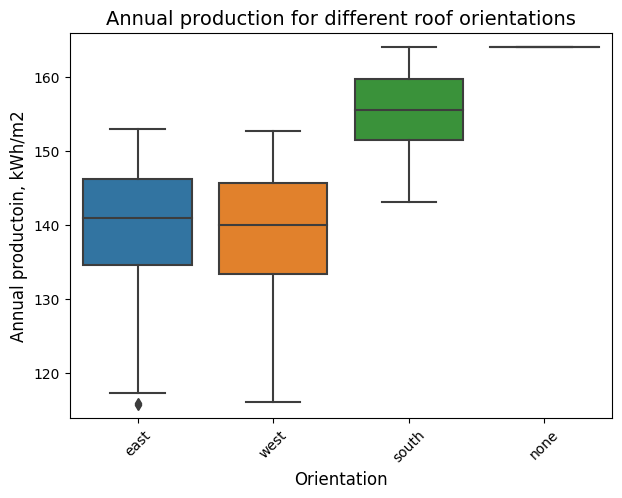

In [476]:
box_plot_orientation_data = pd.concat(
    [estimated_production_by_roof[ANNUAL_KWH_PV_M2], estimated_production_by_roof[ORIENTATION]],
    axis=1
)
fig, ax = plt.subplots(figsize=(7, 5))
fig = sns.boxplot(x=ORIENTATION, y=ANNUAL_KWH_PV_M2, data=box_plot_orientation_data)
fig.axis(ymin=114, ymax=166)
xt = plt.xticks(rotation=45)
plt.title("Annual production for different roof orientations", fontsize=14)
plt.xlabel("Orientation", fontsize=12)
plt.ylabel("Annual productoin, kWh/m2", fontsize=12)
plt.show()

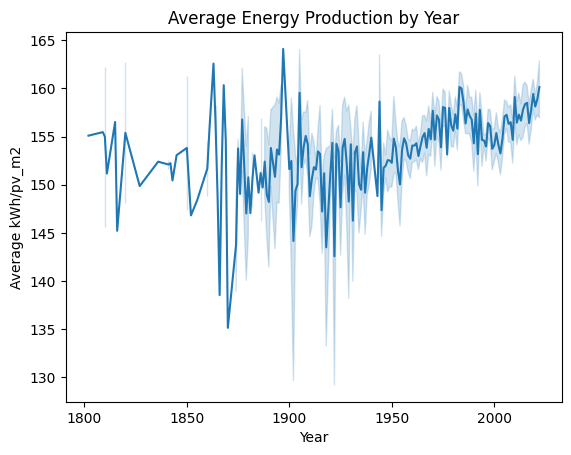

In [131]:
sns.lineplot(data=estimated_production_by_building_final, x=YEAR, y=ANNUAL_KWH_PV_M2, estimator='mean')
plt.xlabel('Year')
plt.ylabel('Average kWh/pv_m2')
plt.title('Average Energy Production by Year')
plt.show()

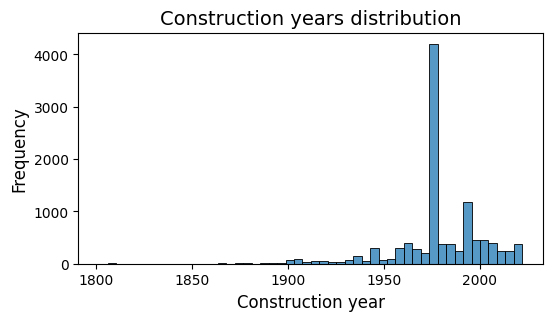

In [453]:
visualization.plot_hist(estimated_production_by_building_final[YEAR], "Construction years distribution", "Construction year", "Frequency", figsize = (6, 3), bins=50)

In [456]:
avg_kwh_per_year = estimated_production_by_building_final[estimated_production_by_building_final[YEAR] > 1960].groupby(YEAR)[ANNUAL_KWH_PV_M2].mean()
max_avg_kwh_per_year = avg_kwh_per_year.max()
year = avg_kwh_per_year.idxmax()
print(f"Max Average kWh/pv_m2 of {max_avg_kwh_per_year} is in {int(year)}.")

Max Average kWh/pv_m2 of 160.14534805194805 is in 1983.


In [457]:
estimated_production_by_building_final[estimated_production_by_building_final[YEAR] > 1960][YEAR].value_counts()

year
1977.0    4000
1995.0    1004
1986.0     191
1996.0     150
1997.0     138
          ... 
2011.0      40
2012.0      40
2014.0      33
1991.0      22
2022.0      12
Name: count, Length: 62, dtype: int64

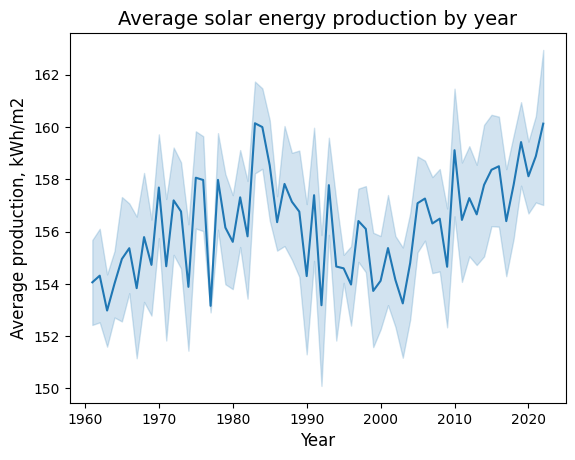

In [462]:
sns.lineplot(data=estimated_production_by_building_final[estimated_production_by_building_final[YEAR] > 1960], x=YEAR, y=ANNUAL_KWH_PV_M2, estimator='mean')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average production, kWh/m2', fontsize=12)
plt.title('Average solar energy production by year', fontsize=14)
plt.show()

### Colored production map

In [149]:
high_threshold = estimated_production_by_building_final[ANNUAL_KWH_PV_M2].quantile(0.75)
low_threshold = estimated_production_by_building_final[ANNUAL_KWH_PV_M2].quantile(0.25)

In [152]:
estimated_production_by_building_final['production_cluster'] = 'Medium'
estimated_production_by_building_final.loc[estimated_production_by_building_final[ANNUAL_KWH_PV_M2] >= high_threshold, 'production_cluster'] = 'High'
estimated_production_by_building_final.loc[estimated_production_by_building_final[ANNUAL_KWH_PV_M2] <= low_threshold, 'production_cluster'] = 'Low'

In [374]:
cluster_colors = {
    'Medium': 'green',
    'High': 'red',
    'Low': 'blue',
}
estimated_production_by_building_final[COLOR] = estimated_production_by_building_final['production_cluster'].map(cluster_colors)


In [377]:
all_roofs = pd.read_csv(ROOFS_PATH)

In [378]:
all_roofs = all_roofs[[ETAK_ID, ROOF_ID, POINTS]]

In [379]:
all_roofs[ETAK_ID] = all_roofs[ETAK_ID].astype(str)
all_roofs[ROOF_ID] = all_roofs[ROOF_ID].astype(str)


In [380]:
all_roofs[POINTS] = all_roofs[POINTS].apply(lambda x: ast.literal_eval(x))

In [381]:
all_roofs[POLYGON] = all_roofs.apply(data_processing.create_polygon, axis=1)

In [382]:
all_roofs = all_roofs.merge(estimated_production_by_building_final[[ETAK_ID, COLOR]], how="left", on=ETAK_ID)

In [383]:
all_roofs[COLOR].fillna("black", inplace=True)

In [384]:
all_buildings_with_districts = pd.read_csv(BUILDINGS_PATH, usecols=[ETAK_ID, DISTRICT])
all_buildings_with_districts[ETAK_ID] = all_buildings_with_districts[ETAK_ID].astype(str)

In [385]:
all_roofs = all_roofs.merge(all_buildings_with_districts[[ETAK_ID, DISTRICT]], how="left", on=ETAK_ID)

In [386]:
all_roofs = all_roofs[all_roofs[DISTRICT] != "Endine Tähtvere vald"]


In [387]:
gdf_custom_polygons = gpd.GeoDataFrame(
    all_roofs[[ETAK_ID, ROOF_ID, POLYGON, COLOR]].copy(),
    geometry=POLYGON,
    crs="EPSG:3301"
)


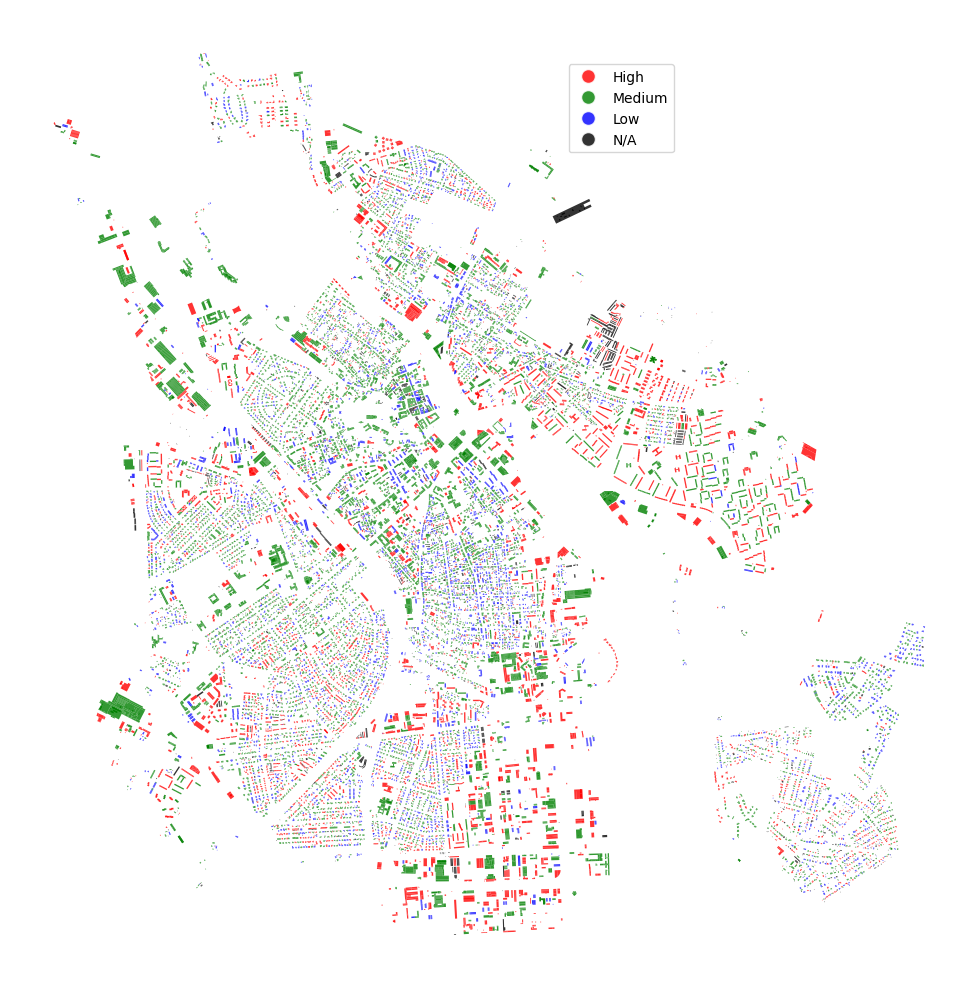

In [408]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_custom_polygons.plot(ax=ax, facecolor=gdf_custom_polygons[COLOR], alpha=0.8, linewidth=0)
legend_items = [Line2D([0], [0], marker='o', color='w', alpha=0.8, label='High', markerfacecolor='red', markersize=10),
                Line2D([0], [0], marker='o', color='w', alpha=0.8, label='Medium', markerfacecolor='green', markersize=10),
                Line2D([0], [0], marker='o', color='w', alpha=0.8, label='Low', markerfacecolor='blue', markersize=10),
                Line2D([0], [0], marker='o', color='w', alpha=0.8, label='N/A', markerfacecolor='black', markersize=10)]

ax.legend(handles=legend_items, bbox_to_anchor=(0.7, 0.95))
plt.axis('off')
plt.tight_layout()
plt.savefig(WD.joinpath("images/prod_map.png"), dpi=1200)
plt.show()

In [537]:
estimated_production_by_building_final[estimated_production_by_building_final[ETAK_ID] == "715333"]

,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,...,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation,production_cluster,color
4703,715333,159.914545,8.095455,13.322727,1264.621008,2.945455,7.460909,14.132727,19.313636,23.921818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none,Medium,green


In [539]:
estimated_production_by_building_final[estimated_production_by_building_final[ETAK_ID] == "717174"]


,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,...,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation,production_cluster,color
5646,717174,164.1,8.74,13.67,1265.463989,3.4,8.3,15.0,19.73,23.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none,High,red


In [540]:
estimated_production_by_roof[estimated_production_by_roof[ETAK_ID] == "715333"]

,etak_id,roof_id,roof_area,points,orientation,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,...,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
17562,715333,17295,193.871788,"[[6473648.86, 661171.68, 16.85], [6473656.41, ...",none,1,13,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17563,715333,17296,356.238949,"[[6473647.24, 661179.36, 16.799999999999997], ...",none,2,-159,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17564,715333,17298,47.907294,"[[6473646.23, 661150.94, 16.71], [6473646.67, ...",none,3,-150,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17565,715333,17299,399.504405,"[[6473644.76, 661188.58, 16.83], [6473645.08, ...",none,1,28,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17566,715333,17300,13.044830,"[[6473623.7, 661220.84, 16.729999999999997], [...",none,0,-165,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17567,715333,17301,4.276318,"[[6473629.86, 661226.92, 16.79], [6473626.67, ...",none,0,-151,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17568,715333,17304,193.798574,"[[6473660.06, 661139.3, 16.83], [6473667.29, 6...",none,0,119,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
17569,715333,17292,10.228337,"[[6473633.18, 661193.18, 17.199999999999996], ...",south,18,29,151.62,6.85,12.63,...,12.46,18.46,23.90,23.63,23.35,19.19,12.99,6.50,2.07,1.16
17570,715333,17293,16.011722,"[[6473644.76, 661188.58, 17.28], [6473643.77, ...",south,22,29,154.17,7.16,12.85,...,12.87,18.79,24.01,23.60,23.38,19.41,13.32,6.79,2.21,1.29
17571,715333,17297,16.026878,"[[6473632.38, 661217.55, 17.22], [6473638.92, ...",south,20,29,152.95,7.01,12.75,...,12.67,18.63,23.96,23.62,23.37,19.30,13.16,6.65,2.14,1.22


In [541]:
estimated_production_by_roof[estimated_production_by_roof[ETAK_ID] == "717174"]

,etak_id,roof_id,roof_area,points,orientation,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,...,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
20530,717174,46025,1265.463989,"[[6473606.12, 661274.25, 16.97], [6473596.32, ...",none,0,-64,164.1,8.74,13.67,...,15.0,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06


In [542]:
estimated_production_by_roof[estimated_production_by_roof[ETAK_ID] == "713893"]

,etak_id,roof_id,roof_area,points,orientation,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,...,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
15437,713893,51515,33.790329,"[[6473811.49, 660912.53, 18.97], [6473803.16, ...",none,2,-156,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15438,713893,51516,47.907004,"[[6473800.87, 660915.64, 17.229999999999997], ...",none,1,-90,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15439,713893,51517,175.955760,"[[6473824.12, 660929.19, 17.0], [6473855.88, 6...",none,2,-71,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15440,713893,51518,660.012734,"[[6473823.73, 660929.04, 19.47], [6473824.12, ...",none,2,111,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15441,713893,51520,21.799734,"[[6473915.88, 660963.02, 17.309999999999995], ...",none,3,-160,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15442,713893,51521,81.402010,"[[6473808.89, 660923.57, 17.029999999999994], ...",none,2,-73,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15443,713893,51522,71.069638,"[[6473856.14, 660940.99, 17.009999999999998], ...",none,2,-74,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15444,713893,51523,165.768048,"[[6473869.15, 660945.79, 16.989999999999995], ...",none,2,-68,164.10,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
15445,713893,51524,63.327499,"[[6473915.88, 660963.02, 16.989999999999995], ...",south,47,25,159.61,8.55,13.30,...,14.47,19.44,23.24,22.08,22.21,19.45,14.47,8.06,2.92,1.99


In [543]:
estimated_production_by_building_final[estimated_production_by_building_final[ETAK_ID] == "713893"]

,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,...,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation,production_cluster,color
3984,713893,163.601111,8.718889,13.628889,1321.032755,3.385556,8.268889,14.941111,19.697778,23.835556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none,Medium,green


In [544]:
estimated_production_by_roof[estimated_production_by_roof[ETAK_ID] == "716703"]

,etak_id,roof_id,roof_area,points,orientation,tilt,azimuth,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,...,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,Jun_kwh/pv_m2,Jul_kwh/pv_m2,Aug_kwh/pv_m2,Sep_kwh/pv_m2,Oct_kwh/pv_m2,Nov_kwh/pv_m2,Dec_kwh/pv_m2
19699,716703,5159,166.406568,"[[6473791.07, 661118.69, 16.15], [6473791.41, ...",east,16,-59,142.5,5.97,11.88,...,11.39,17.15,23.13,23.10,22.61,18.20,11.99,5.77,1.72,0.88
19700,716703,5160,13.326393,"[[6473746.47, 661092.63, 16.189999999999998], ...",none,6,123,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19701,716703,5161,258.265562,"[[6473694.54, 661059.62, 15.870000000000005], ...",none,2,121,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19702,716703,5162,70.448711,"[[6473710.72, 661071.74, 16.130000000000003], ...",none,5,121,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19703,716703,5163,17.979649,"[[6473727.7, 661069.77, 17.92], [6473722.94, 6...",none,0,-149,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19704,716703,5164,688.802930,"[[6473791.07, 661118.69, 15.82], [6473796.73, ...",none,1,-52,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19705,716703,5165,10.304858,"[[6473771.17, 661096.37, 15.920000000000002], ...",none,1,121,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19706,716703,5166,10.306765,"[[6473771.17, 661096.37, 18.0], [6473770.26, 6...",none,1,-149,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19707,716703,5167,123.291313,"[[6473710.72, 661071.74, 16.130000000000003], ...",none,2,119,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06
19708,716703,5168,50.919632,"[[6473740.57, 661089.18, 16.160000000000004], ...",none,4,-106,164.1,8.74,13.67,...,15.00,19.73,23.91,22.72,22.81,19.89,14.89,8.36,3.02,2.06


In [545]:
estimated_production_by_building_final[estimated_production_by_building_final[ETAK_ID] == "716703"]

,etak_id,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,May_kwh/pv_m2,...,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation,production_cluster,color
5397,716703,161.94,8.463,13.491,1410.052381,3.225,7.963,14.639,19.472,23.832,...,0.008144,0.0,0.0,0.0,0.0,0.0,0.0,none,Medium,green


### Districts construction years distribution

In [531]:
data_to_plot = estimated_production_by_building_final[estimated_production_by_building_final[DISTRICT] != "Endine Tähtvere vald"]


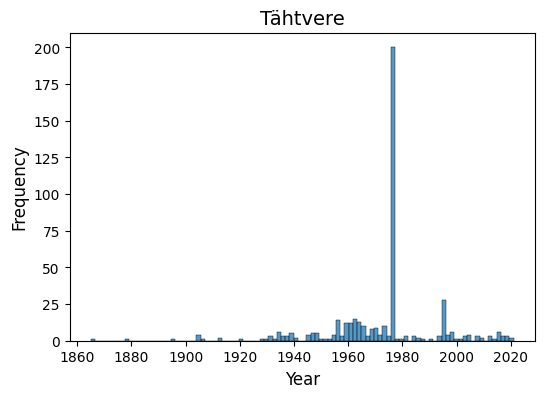

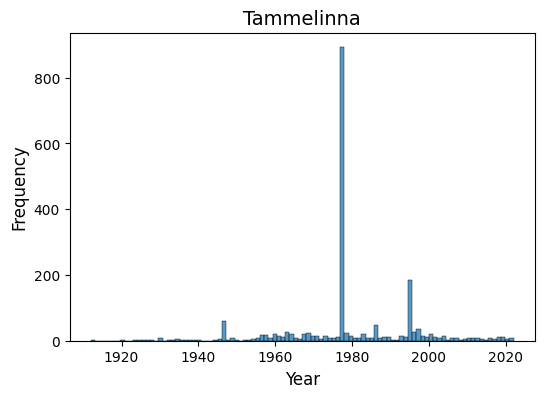

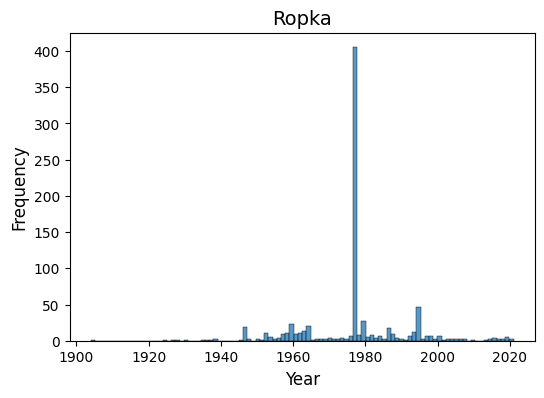

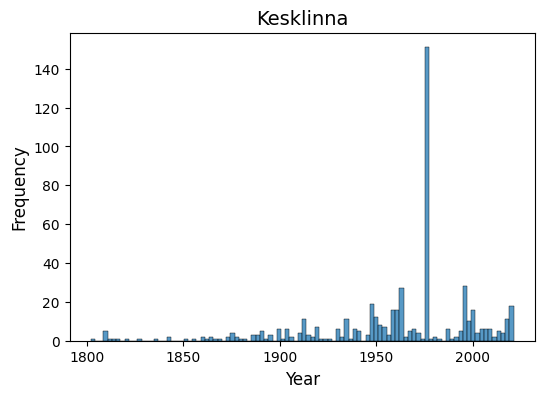

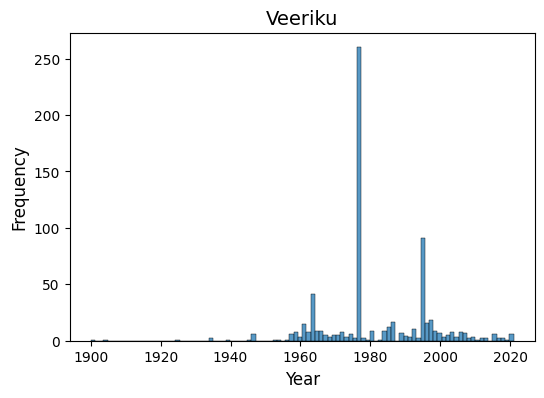

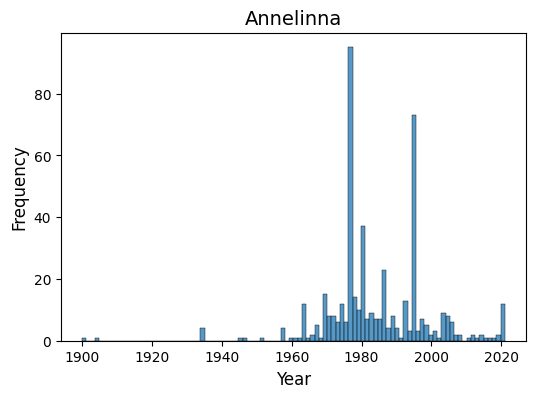

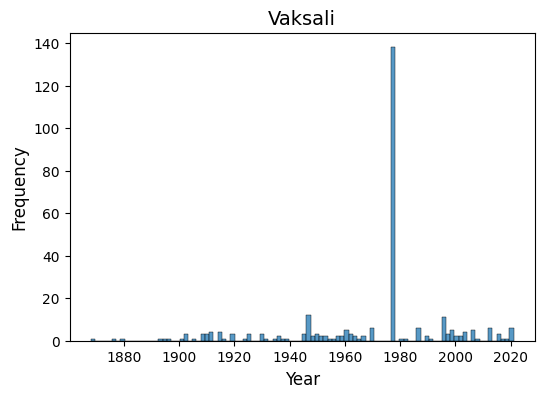

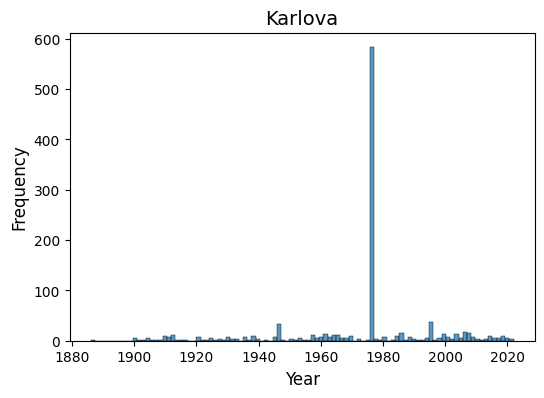

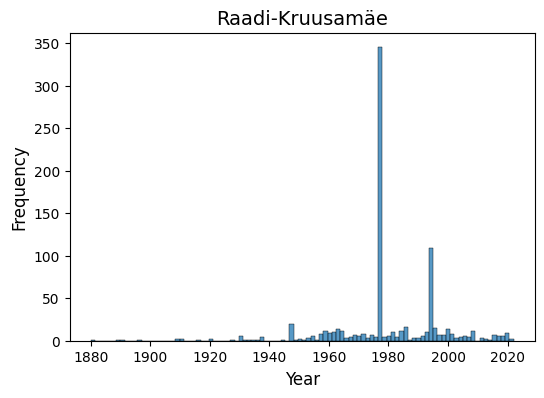

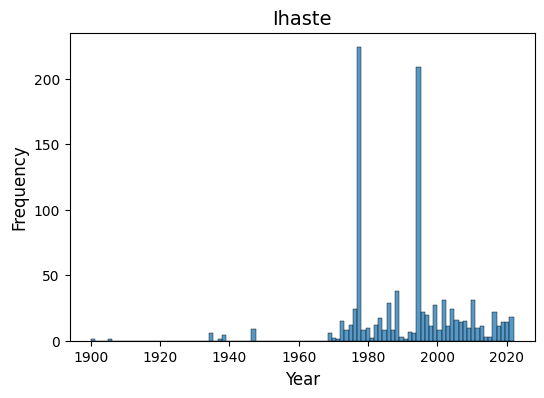

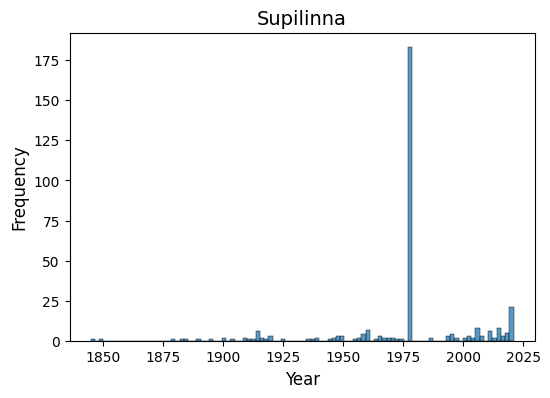

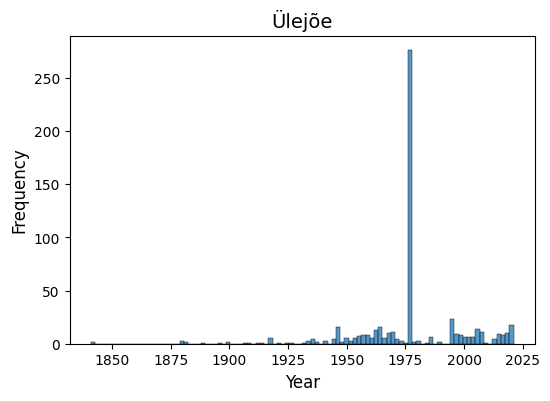

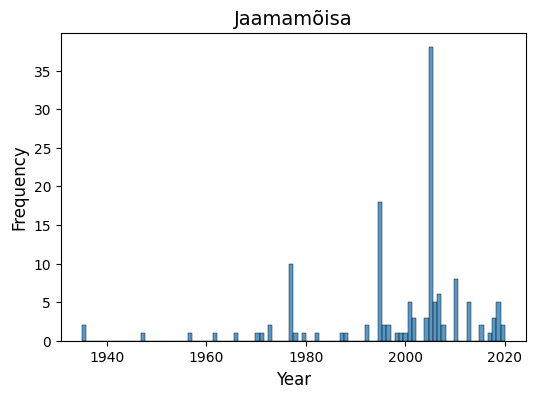

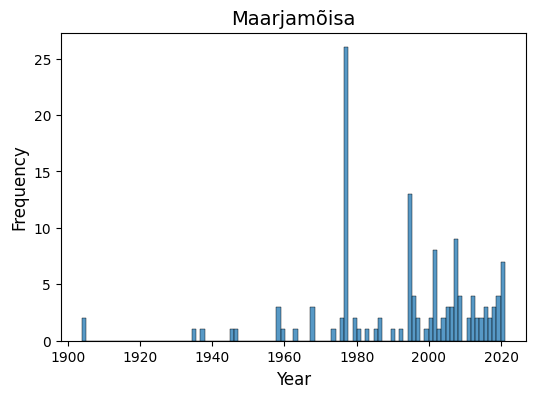

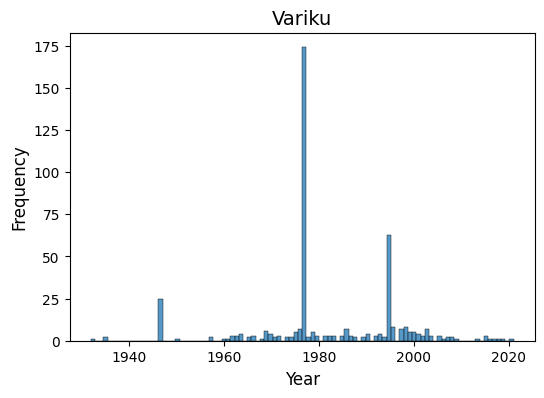

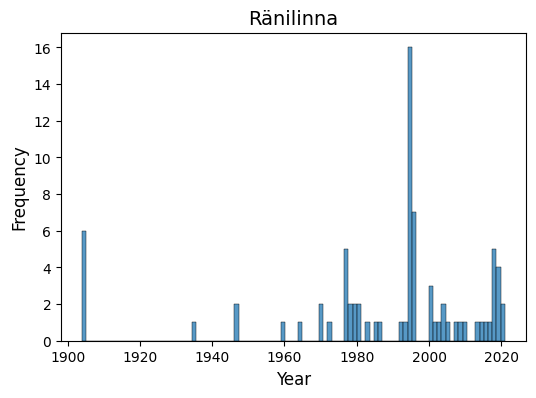

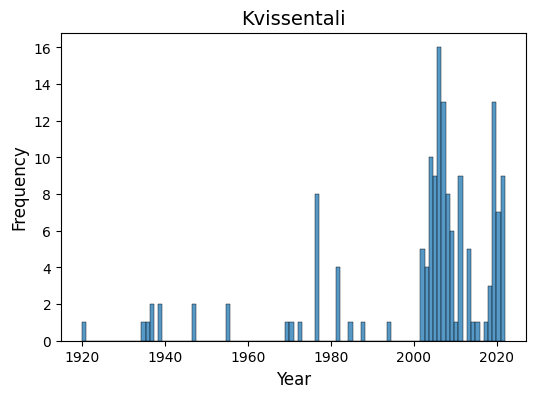

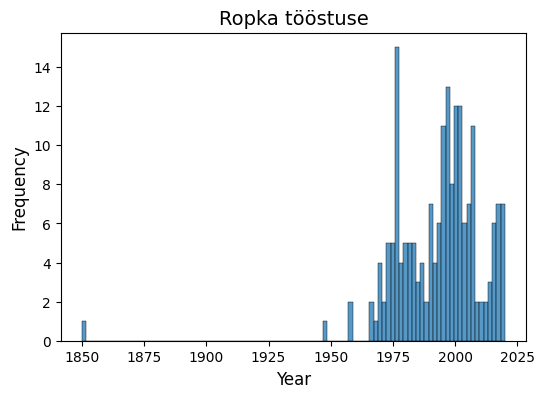

In [534]:
districts = data_to_plot[DISTRICT].unique()

for district in districts:
    visualization.plot_hist(data_to_plot[data_to_plot[DISTRICT] == district][YEAR], district, "Year", "Frequency", figsize=(6,4), bins=100)